**Problem Statement : Airbnb hotel booking Analysis**                                            
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments.


**Questions:**                
1. What are the different property types in the dataset?
2. Which neighborhood group has the highest number of listings?
3. which neighborhood group have the highest average prices for Airbnb listings?
4. Is there a releationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verfied identities more likely to recieve positive reviews?
7. Is there a correlation between the price of listing and it's service fee?
8. What is the average review rate number(e.g. stars) for listings and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

**Data Wrangling**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [7]:
data = pd.read_excel("Downloads/1730285881-Airbnb_Open_Data.xlsx")

In [9]:
data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
data.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [13]:
data.isna().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
data.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

**Problems Identified within the Data**            
* 541 duplicated Records where found in the data
* Insuffiecient information were recorded a for the house_rule and Licence columns
* Dollar sign and commas recorded along with the values for prices and service fee
* The currency for price and service fee were not added to the columns titles
* Missing values in some records
* Columns like the price,service fee, id, last review, Construction year are assigned wrong datatypes
* In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records
* Some outliers were identified in the availabilty 365 column

**CLEAN THE DATA**
**Steps to be taken for data cleaning**             
* Drop duplicates records
* drop house_rules and licence columns with insuffcient data
* Remove all dollar sign in the price and service fee columns
* Remove all commas from the price and service fee columns
* Rename the price and service fee columns to include a dollar signs
* drop all records with missing values
* Change the all mismatched datatypes to the appropriate once
* correct the spelling of 'brookln' to 'Brookln'
* Get the rid of outliers in the 'availability 365' column data

In [15]:
# Drop duplicates records
data.drop_duplicates(inplace=True)

In [26]:
# drop house_rules and licence columns with insuffcient data
data.drop(['house_rules','license'],axis = 1,inplace = True)

In [48]:
# Remove all dollar sign in the price and service fee columns
data['price'] = data['price'].replace('$','')

In [42]:
data['service fee'] = data['service fee'].replace('$','')

In [50]:
# Remove all commas from the price and service fee columns
data['service fee'] = data['service fee'].replace(',','')
data['price'] = data['price'].replace(',','')

In [56]:
data.rename(columns = {
    'price':'price_$',
    'service fee':'service fee_$'
} ,inplace = True)

In [60]:
# drop all records with missing values
data.dropna(inplace = True)

In [67]:
# Change the all mismatched datatypes to the appropriate once
data['id'] = data['id'].astype(str)
data['host id'] = data['host id'].astype(str)
data['last review'] = pd.to_datetime(data['last review'])

In [73]:
# Correct the spelling of 'brookln' to 'Brooklyn'
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

In [77]:
# Get the rid of outliers in the 'availability 365' column data
data = data.drop(data[data['availability 365'] > 500].index )

In [79]:
data.duplicated().value_counts()

False    83389
Name: count, dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

**Exploratory Data Analysis(EDA)**

* What are the different property types in the dataset?

In [114]:
# What are the different property types in the dataset?
property_types = data['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


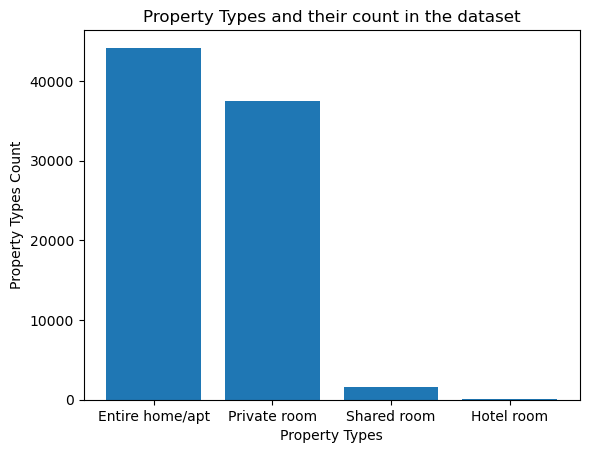

In [146]:
# bar chart for count of room type
property_types.reset_index(inplace = True)
plt.bar(property_types['room type'],property_types['count'])
plt.xlabel('Property Types')
plt.ylabel('Property Types Count')
plt.title('Property Types and their count in the dataset')
plt.show()

* Which neighborhood group has the highest number of listings?
  

In [142]:
# Which neighborhood group has the highest number of listings?
highest_nlistings = data['neighbourhood group'].value_counts(ascending=False).to_frame().reset_index()
highest_nlistings

,neighbourhood group,count
0,Brooklyn,34622
1,Manhattan,34560
2,Queens,11124
3,Bronx,2267
4,Staten Island,816


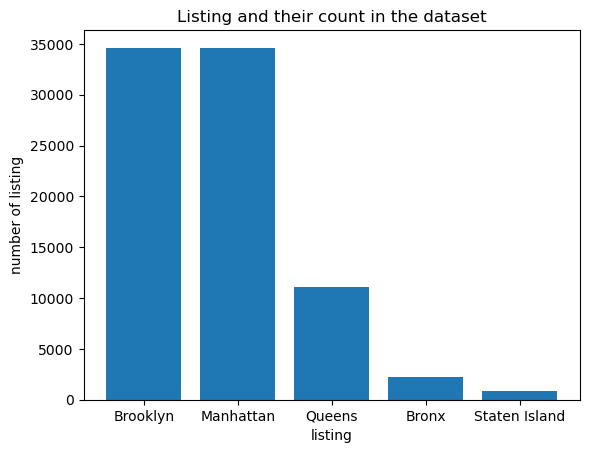

In [150]:
# bar chart for highest number of listing
plt.bar(highest_nlistings['neighbourhood group'],highest_nlistings['count'])
plt.xlabel('listing')
plt.ylabel('number of listing')
plt.title('Listing and their count in the dataset')
plt.show()

* which neighborhood group have the highest average prices for Airbnb listings?

In [179]:
highest_avg = data.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame().reset_index()
highest_avg

,neighbourhood group,price_$
0,Queens,630.502517
1,Bronx,630.201147
2,Brooklyn,627.434261
3,Manhattan,623.435561
4,Staten Island,622.132353


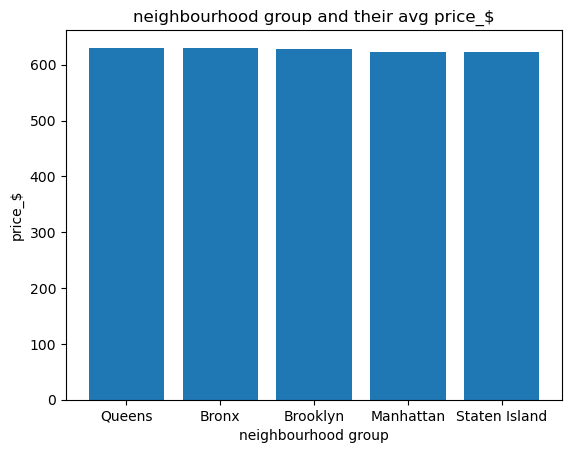

In [183]:
plt.bar(highest_avg['neighbourhood group'],highest_avg['price_$'])
plt.xlabel('neighbourhood group')
plt.ylabel('price_$')
plt.title('neighbourhood group and their avg price_$')
plt.show()

* Is there a releationship between the construction year of property and price?

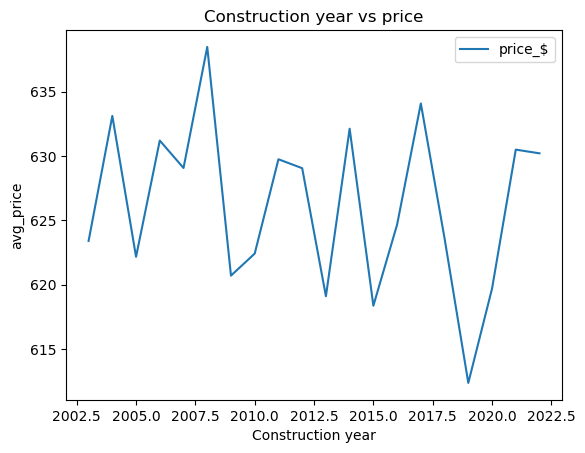

In [200]:
data.groupby('Construction year')['price_$'].mean().to_frame().plot()
plt.xlabel("Construction year")
plt.ylabel("avg_price")
plt.title("Construction year vs price")
plt.show()

**AS we can see there is no realtion between price and construction year**

* Who are the top 10 hosts by calculated host listing count?

In [247]:
top_10_host = data.groupby(data['host name'])['calculated host listings count'].sum().sort_values(ascending=False).to_frame().reset_index().iloc[:10]
top_10_host

,host name,calculated host listings count
0,Sonder (NYC),111921.0
1,Karen,42410.0
2,Jeniffer,31447.0
3,Blueground,21168.0
4,Kaz,17552.0
5,Corporate Housing,14833.0
6,Soya,10260.0
7,Stay With Vibe,10260.0
8,Kara,10092.0
9,Jeremy & Laura,10080.0


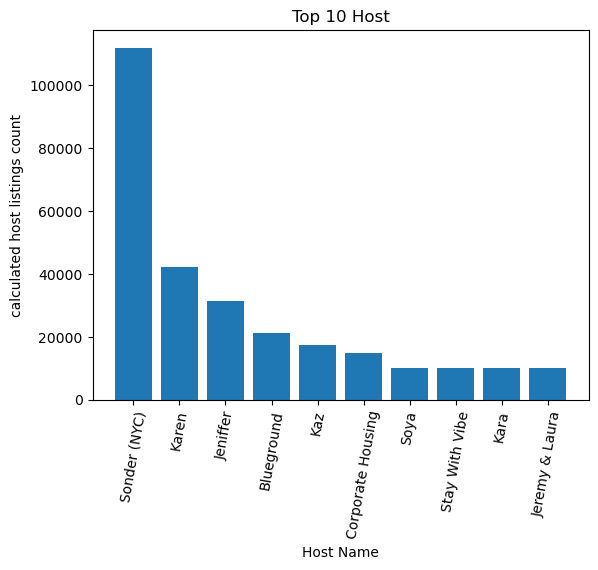

In [265]:
plt.bar(top_10_host['host name'],top_10_host['calculated host listings count'])
plt.xlabel("Host Name")
plt.ylabel("calculated host listings count")
plt.title("Top 10 Host")
plt.xticks(rotation=80)
plt.show()

* Are hosts with verfied identities more likely to recieve positive reviews?

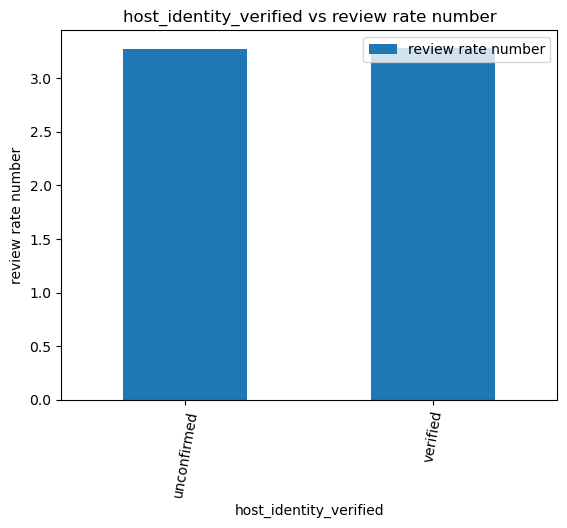

In [285]:
data.groupby(['host_identity_verified'])['review rate number'].mean().to_frame().reset_index().plot(kind='bar',x='host_identity_verified')
plt.xlabel('host_identity_verified')
plt.ylabel('review rate number')
plt.title('host_identity_verified vs review rate number')
plt.xticks(rotation=80)
plt.show()

**As we can see there a slightly difference between unconfirmed and verified host**

* Is there a correlation between the price of listing and it's service fee?

In [294]:
data['price_$'].corr(data['service fee_$'])

0.999990908297645

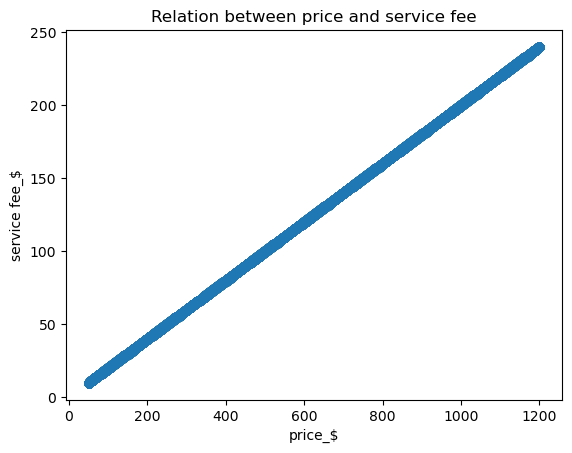

In [300]:
sns.regplot(data, x = 'price_$', y = 'service fee_$')
plt.title('Relation between price and service fee')
plt.show()

**As we can there is very similarites in price and service fee**

* What is the average review rate number(e.g. stars) for listings and does it vary based on the neighborhood group and room type?

In [321]:
new = data.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame().reset_index()
new

,neighbourhood group,room type,review rate number
0,Bronx,Entire home/apt,3.381881
1,Bronx,Private room,3.305810
2,Bronx,Shared room,3.356322
3,Brooklyn,Entire home/apt,3.242491
4,Brooklyn,Hotel room,3.833333
5,Brooklyn,Private room,3.274773
6,Brooklyn,Shared room,3.323383
7,Manhattan,Entire home/apt,3.268846
8,Manhattan,Hotel room,3.500000
9,Manhattan,Private room,3.285431


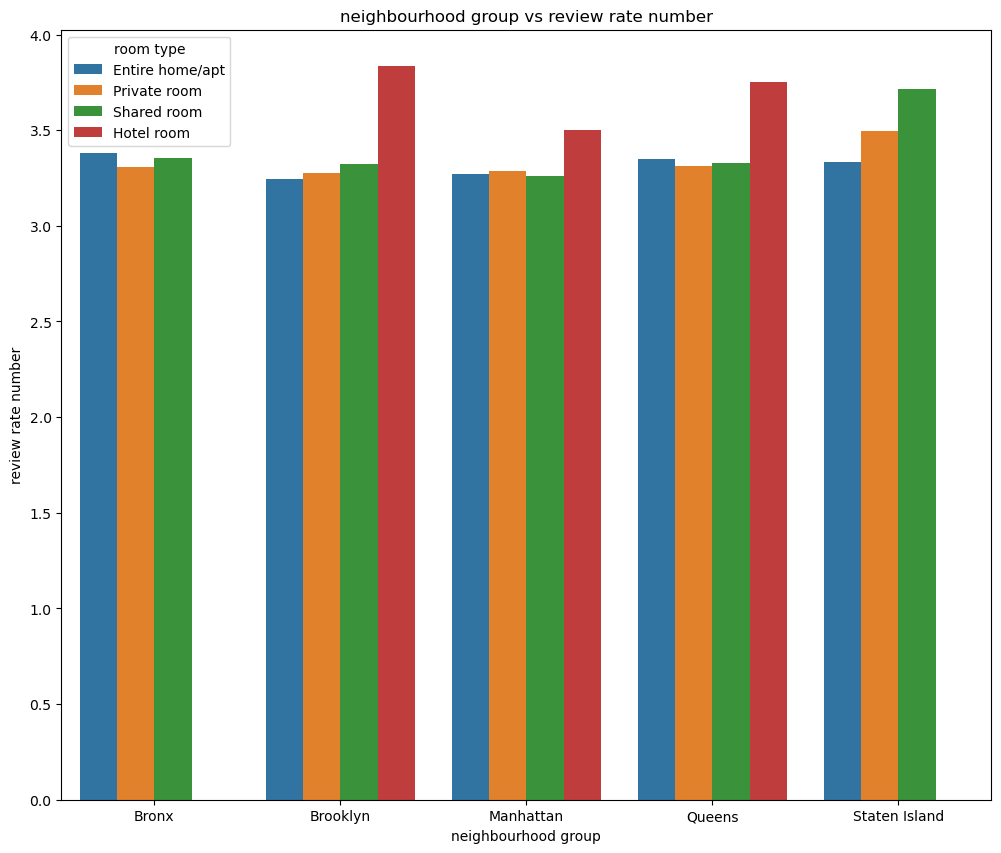

In [335]:
plt.figure(figsize = [12,10])
sns.barplot(new , x = 'neighbourhood group' , y = 'review rate number' , hue = 'room type')
plt.xlabel("neighbourhood group")
plt.ylabel("review rate number")
plt.title("neighbourhood group vs review rate number")
plt.show()

**Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.**

* Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

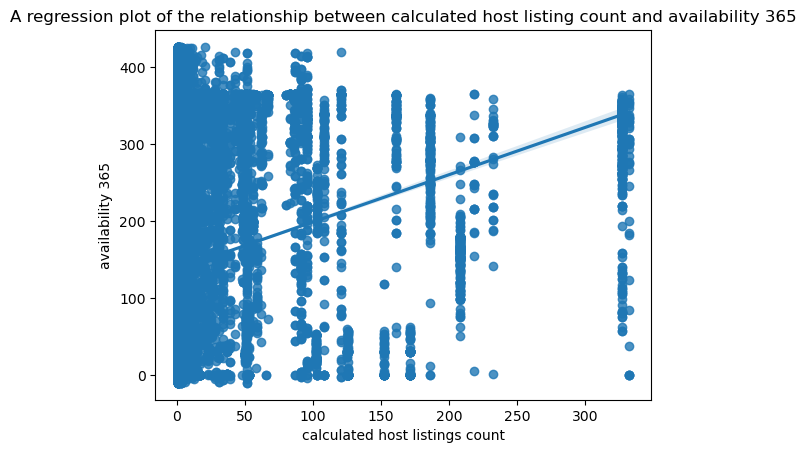

In [343]:
sns.regplot(data, x = 'calculated host listings count', y = "availability 365")
plt.xlabel('calculated host listings count')
plt.ylabel('availability 365')
plt.title("A regression plot of the relationship between calculated host listing count and availability 365")
plt.show()

In [345]:
data['calculated host listings count'].corr(data['availability 365'])

0.13599714715703334

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we’ve uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.